In [ ]:
pip install inference_sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.6/319.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.0 MB/s eta 0:00:00


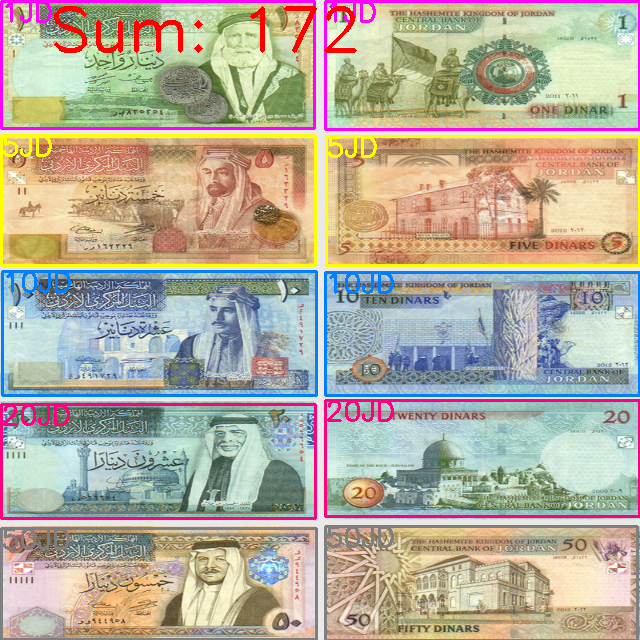

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from inference_sdk import InferenceHTTPClient

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="8w0l66l36DdfM1UAiIQw"
)

# Load the original image
original_image = cv2.imread("/content/currency_main_0.jpg")

# Resize the original image to a smaller size (you can adjust the dimensions as needed)
resized_image = cv2.resize(original_image, (640, 640))

# Infer on the resized image
result = CLIENT.infer(resized_image, model_id="coins-nepnq/1")

# Initialize sum
sum = 0

# Define colors for each class
class_colors = {
    "5pts": (255, 0, 0),  # Blue
    "10pts": (0, 255, 0),  # Green
    "25pts": (0, 0, 255),  # Red
    "50pts": (255, 255, 0),  # Cyan
    "1JD": (255, 0, 255),  # Magenta
    "5JD": (0, 255, 255),  # Yellow
    "10JD": (255, 127, 0),  # Orange
    "20JD": (127, 0, 255),  # Violet
    "50JD": (127, 127, 127),  # Gray
}

# Iterate over the predictions to draw bounding boxes and calculate the sum
for pred in result['predictions']:
    class_name = pred['class']
    # Use 'x', 'y', 'width', and 'height' directly from the prediction
    x = int(pred['x'])
    y = int(pred['y'])
    x_center, y_center = int(pred['x']), int(pred['y'])
    width, height = int(pred['width']), int(pred['height'])
    x = x_center - width // 2
    y = y_center - height // 2

    # Get the color for the class
    color = class_colors.get(class_name, (0, 0, 0))  # Default to black if class not found

    # Draw bounding box around the detected object with class-specific color
    cv2.rectangle(resized_image, (x, y), (x + width, y + height), color, 2)

    # Display class name near the bounding box
    cv2.putText(resized_image, class_name, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Calculate the sum based on class_name
    if class_name == "5pts":
        sum += 0.05
    elif class_name == "10pts":
        sum += 0.10
    elif class_name == "25pts":
        sum += 0.25
    elif class_name == "50pts":
        sum += 0.50
    elif class_name == "1JD":
        sum += 1
    elif class_name == "5JD":
        sum += 5
    elif class_name == "10JD":
        sum += 10
    elif class_name == "20JD":
        sum += 20
    elif class_name == "50JD":
        sum += 50

# Draw sum on the image with large font and red color
cv2.putText(resized_image, f'Sum: {round(sum, 2)}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

# Display the resized image with sum and bounding boxes using cv2_imshow
cv2_imshow(resized_image)


In [ ]:
import cv2
import time  # Import time module to calculate FPS
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from IPython.display import FileLink

# Initialize the client with your API details
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="8NYH7XPD8XFqO8HiUdQo"
)

# Capture the video from your uploaded file
cap = cv2.VideoCapture('/content/Jordanian dinar coins and banknotes.mp4')

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Unable to open video.")
    exit()

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))


class_colors = {
    "5pts": (255, 0, 0),  # Blue
    "10pts": (0, 255, 0),  # Green
    "25pts": (0, 0, 255),  # Red
    "50pts": (255, 255, 0),  # Cyan
    "1JD": (255, 0, 255),  # Magenta
    "5JD": (0, 255, 255),  # Yellow
    "10JD": (255, 127, 0),  # Orange
    "20JD": (127, 0, 255),  # Violet
    "50JD": (127, 127, 127),  # Gray
}



total_sum = 0  # Initialize total sum

# Process each frame of the video
while cap.isOpened():
    start_time = time.time()  # Start time for FPS calculation

    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no frame is read

    # Infer on the current frame
    result = CLIENT.infer(frame, model_id="object-detection-count/3")

    # Iterate over the predictions to draw bounding boxes and calculate the sum
    for pred in result['predictions']:
        class_name = pred['class']
        x_center, y_center = int(pred['x']), int(pred['y'])
        width, height = int(pred['width']), int(pred['height'])
        x = x_center - width // 2
        y = y_center - height // 2

        if class_name == "5pts":
          sum += 0.05
        elif class_name == "10pts":
            sum += 0.10
        elif class_name == "25pts":
            sum += 0.25
        elif class_name == "50pts":
            sum += 0.50
        elif class_name == "1JD":
            sum += 1
        elif class_name == "5JD":
            sum += 5
        elif class_name == "10JD":
            sum += 10
        elif class_name == "20JD":
            sum += 20
        elif class_name == "50JD":
            sum += 50
        color = class_colors.get(class_name, (0, 0, 0))  # Default to black if class not found

        # Draw bounding box around the detected object with class-specific color
        cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)

        # Display class name near the bounding box
        cv2.putText(frame, class_name, (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Calculate and display FPS
    end_time = time.time()
    fps = 1 / (end_time - start_time)
    cv2.putText(frame, f"FPS: {fps:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the total sum on the frame
    cv2.putText(frame, f"Total Sum: {total_sum}", (20, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Write the frame into the output video
    out.write(frame)

# Release everything when done
cap.release()
out.release()

# Provide a link to download the processed video
print("Video processing complete. Download the video from the link below:")
FileLink('/content/output_video.avi')


HTTPCallErrorError: HTTPCallErrorError(description='403 Client Error: Forbidden for url: https://detect.roboflow.com/object-detection-count/3?api_key=8N***Qo&disable_active_learning=False', api_message='Forbidden',status_code=403)

In [ ]:
import cv2
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from IPython.display import FileLink

# Initialize the client with your API details
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="YOUR_API_KEY_HERE"
)

# Capture the video from your uploaded file
cap = cv2.VideoCapture('/content/Jordanian dinar coins and banknotes.mp4')

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Unable to open video.")
    exit()

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Define colors for each class and a set to keep track of processed detections
class_colors = {
    # Your class colors
}
processed_detections = set()

# Process each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    result = CLIENT.infer(frame, model_id="object-detection-count/3")
    frame_sum = 0  # Sum for the current frame

    for pred in result['predictions']:
        class_name = pred['class']
        x_center, y_center = int(pred['x']), int(pred['y'])
        width, height = int(pred['width']), int(pred['height'])
        detection_key = (class_name, x_center, y_center)  # Simple key to identify detections

        if detection_key not in processed_detections:
            processed_detections.add(detection_key)  # Mark this detection as processed
            # Update the sum based on class_name
              if class_name == "5pts":
                  sum += 0.05
              elif class_name == "10pts":
                  sum += 0.10
              elif class_name == "25pts":
                  sum += 0.25
              elif class_name == "50pts":
                  sum += 0.50
              elif class_name == "1JD":
                  sum += 1
              elif class_name == "5JD":
                  sum += 5
              elif class_name == "10JD":
                  sum += 10
              elif class_name == "20JD":
                  sum += 20
              elif class_name == "50JD":
                  sum += 50
        color = class_colors.get(class_name, (0, 0, 0))  # Default to black if class not found

        # Draw bounding box around the detected object with class-specific color
        cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)

        # Display class name near the bounding box
        cv2.putText(frame, class_name, (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


    # Display the frame sum on the frame
    cv2.putText(frame, f"Frame Sum: {frame_sum}", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Write the frame into the output video
    out.write(frame)

cap.release()
out.release()

# Provide a link to download the processed video
print("Video processing complete. Download the video from the link below:")
FileLink('/content/output_video.avi')
